# Regresión multiple (Multi-variable)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils_multi import  load_house_data, run_gradient_descent 
from utils_multi import  norm_plot, plt_equal_scale, plot_cost_i_w
from utils_common import dlc
from utils import *
np.set_printoptions(precision=2)
plt.style.use('./deeplearning.mplstyle')
import random

c:\Anaconda3\envs\regresionlineal\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Notación

|General <br />  Notación  | Descripción| Python (if applicable) |
|------------|------------|------------|
| $a$ | escalar                                                     ||
| $\mathbf{a}$ | vector                                                 ||
| $\mathbf{A}$ | matriz                                         ||
| **Regression** |         |    |     |
|  $\mathbf{X}$ | matriz de entrenamiento                  | `X_train` |   
|  $\mathbf{y}$  | objetivos de entrenamiento.                | `y_train` 
|  $\mathbf{x}^{(i)}$, $y^{(i)}$ | $i_{th}$ entrenamiento | `X[i]`, `y[i]`|
| m | número de entrenamiento | `m`|
| n | número de características | `n`|
|  $\mathbf{w}$  |  parameter: weight,                       | `w`    |
|  $b$           |  parameter: bias                                           | `b`    |     
| $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ | el resultado de la evaluación del modelo en  $\mathbf{x}^{(i)}$ parametrizado por $\mathbf{w},b$: $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)}+b$  | `f_wb` | 
|$\frac{\partial J(\mathbf{w},b)}{\partial w_j}$| el gradiente o derivada parcial del costo con respecto a parámetro $w_j$ |`dj_dw[j]`| 
|$\frac{\partial J(\mathbf{w},b)}{\partial b}$| el gradiente o derivada parcial del costo con respecto a parámetro $b$| `dj_db`|

In [2]:
# carga dataset de procesamiento
X_train, y_train, z_train = load_house_data()
X_features = ['inmueble en pies^2','habitaciones','pisos','edad']
"""
print(len(X_train))
print(len(y_train))

print(X_train)
print(y_train)
print(z_train)
"""
data = np.loadtxt("data/MRL02/dataset.txt", delimiter=',', skiprows=1)
print(data[0])

[1.24e+03 3.00e+00 1.00e+00 6.40e+01 3.00e+02 1.00e+00]


<span style="color:green">
Procesamiento del conjunto de datos y sus características trazando cada característica frente al precio del inmueble.
</span>

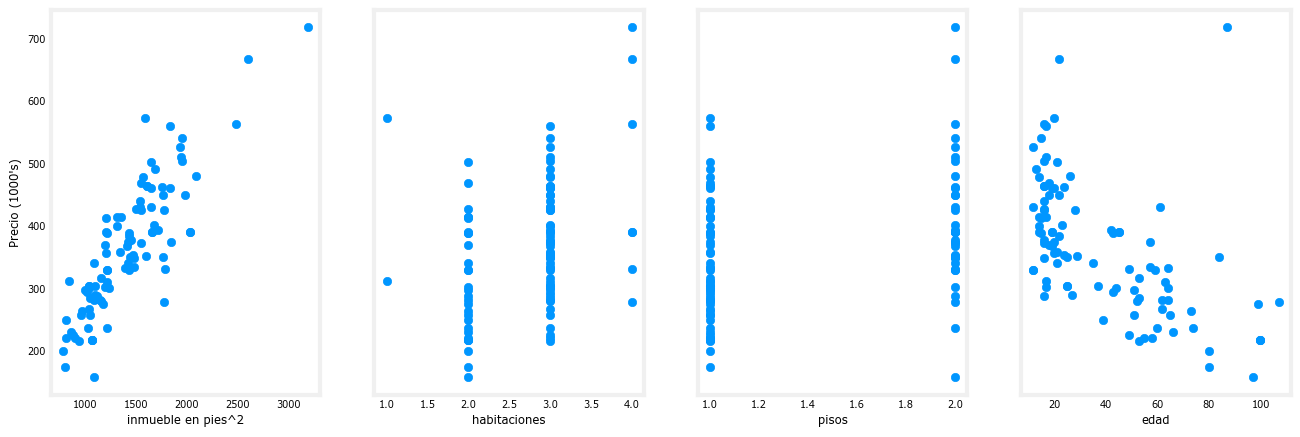

In [3]:
fig,ax=plt.subplots(1, 4, figsize=(16, 5), sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("Precio (1000's)")
plt.show()

Plotting each feature vs. the target, price, provides some indication of which features have the strongest influence on price. Above, increasing size also increases price. Bedrooms and floors don't seem to have a strong impact on price. Newer houses have higher prices than older houses.

<span style="color:green">
Trazar cada función frente al precio objetivo proporciona una indicación de qué funciones tienen la mayor influencia en el precio. Arriba, aumentar el tamaño también aumenta el precio. Los dormitorios y los pisos no parecen tener un fuerte impacto en el precio. Las casas más nuevas tienen precios más altos que las casas más antiguas.
</span>

<a name="toc_15456_5"></a>
## Descenso de gradiente con múltiples variables
<span style="color:green">Estas son las ecuaciones que desarrolló en la última práctica de laboratorio sobre el descenso de gradiente para múltiples variables:</span>

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j := w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{1}  \; & \text{for j = 0..n-1}\newline
&b\ \ := b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

<span style="color:green">donde, n es el número de características, los parámetros</span> $w_j$, $b$, <span style="color:green">se actualizan simultáneamente y donde</span>

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{2}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{3}
\end{align}
$$
* <span style="color:green">m es el número de ejemplos de entrenamiento en el conjunto de datos</span>
* $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ <span style="color:green">es la predicción del modelo, mientras que</span> $y^{(i)}$ <span style="color:green">es el valor objetivo</span>


### $\alpha$ = 9.9e-7

In [4]:
#set alpha to 9.9e-7
_, _, hist = run_gradient_descent(X_train, y_train, 10, alpha = 9.9e-7)

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 9.55884e+04  5.5e-01  1.0e-03  5.1e-04  1.2e-02  3.6e-04 -5.5e+05 -1.0e+03 -5.2e+02 -1.2e+04 -3.6e+02
        1 1.28213e+05 -8.8e-02 -1.7e-04 -1.0e-04 -3.4e-03 -4.8e-05  6.4e+05  1.2e+03  6.2e+02  1.6e+04  4.1e+02
        2 1.72159e+05  6.5e-01  1.2e-03  5.9e-04  1.3e-02  4.3e-04 -7.4e+05 -1.4e+03 -7.0e+02 -1.7e+04 -4.9e+02
        3 2.31358e+05 -2.1e-01 -4.0e-04 -2.3e-04 -7.5e-03 -1.2e-04  8.6e+05  1.6e+03  8.3e+02  2.1e+04  5.6e+02
        4 3.11100e+05  7.9e-01  1.4e-03  7.1e-04  1.5e-02  5.3e-04 -1.0e+06 -1.8e+03 -9.5e+02 -2.3e+04 -6.6e+02
        5 4.18517e+05 -3.7e-01 -7.0e-04 -4.0e-04 -1.3e-02 -2.1e-04  1.2e+06  2.1e+03  1.1e+03  2.8e+04  7.5e+02
        6 5.63212e+05  9.7e-01  1.8e-03  8.7e-04  1.8e-02  6.6e-04 -1.3e+06 -2.5e+03 -1.3e+03 -3.1e+04 -

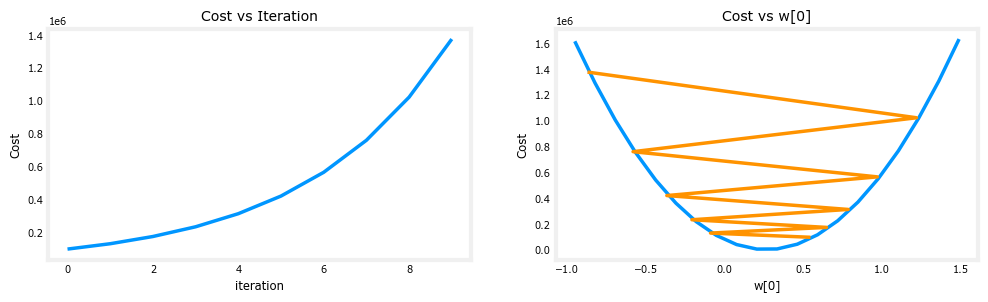

In [5]:
plot_cost_i_w(X_train, y_train, hist)

In [6]:
#set alpha to 9e-7
_,_,hist = run_gradient_descent(X_train, y_train, 10, alpha = 9e-7)

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 6.64616e+04  5.0e-01  9.1e-04  4.7e-04  1.1e-02  3.3e-04 -5.5e+05 -1.0e+03 -5.2e+02 -1.2e+04 -3.6e+02
        1 6.18990e+04  1.8e-02  2.4e-05  2.0e-06 -7.9e-04  1.9e-05  5.3e+05  9.9e+02  5.2e+02  1.3e+04  3.4e+02
        2 5.76572e+04  4.8e-01  8.7e-04  4.4e-04  9.5e-03  3.2e-04 -5.1e+05 -9.4e+02 -4.8e+02 -1.1e+04 -3.4e+02
        3 5.37137e+04  3.4e-02  4.6e-05  2.8e-06 -1.6e-03  3.8e-05  4.9e+05  9.2e+02  4.8e+02  1.2e+04  3.2e+02
        4 5.00474e+04  4.6e-01  8.3e-04  4.1e-04  8.0e-03  3.2e-04 -4.8e+05 -8.7e+02 -4.5e+02 -1.1e+04 -3.1e+02
        5 4.66389e+04  5.0e-02  6.5e-05  2.5e-06 -2.4e-03  5.6e-05  4.6e+05  8.5e+02  4.5e+02  1.2e+04  2.9e+02
        6 4.34700e+04  4.5e-01  8.0e-04  3.8e-04  6.4e-03  3.2e-04 -4.4e+05 -8.1e+02 -4.2e+02 -9.8e+03 -

<span style="color:green">El costo está disminuyendo a lo largo de la ejecución, lo que muestra que alfa no es demasiado grande.</span>

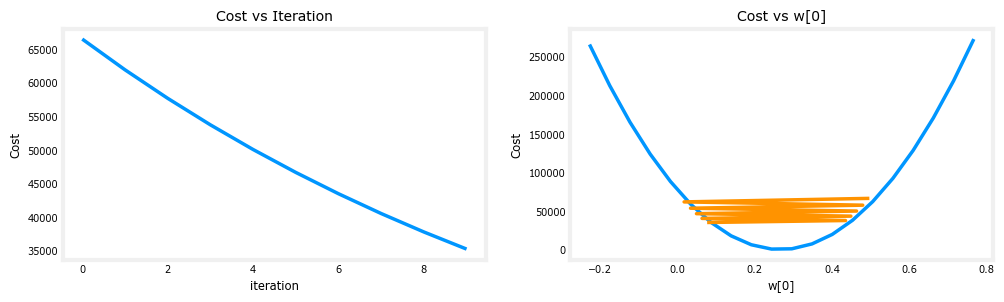

In [7]:
plot_cost_i_w(X_train, y_train, hist)

<span style="color:green">A la izquierda, verá que el costo está disminuyendo como debería. A la derecha, puede ver que</span> $w_0$ <span style="color:green">aún oscila alrededor del mínimo, pero disminuye en cada iteración en lugar de aumentar. Tenga en cuenta que</span> `dj_dw[0]` <span style="color:green">cambia de signo con cada iteración a medida que</span> `w[0]` <span style="color:green">salta sobre el valor óptimo.
Este valor alfa convergerá. Puedes variar el número de iteraciones para ver cómo se comporta.</span>

### $\alpha$ = 1e-7
<span style="color:green">Probemos un valor un poco más pequeño para</span> <span style="color:green">y veamos qué sucede.</span>

In [8]:
#set alpha to 1e-7
_,_,hist = run_gradient_descent(X_train, y_train, 10, alpha = 1e-7)

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 4.42313e+04  5.5e-02  1.0e-04  5.2e-05  1.2e-03  3.6e-05 -5.5e+05 -1.0e+03 -5.2e+02 -1.2e+04 -3.6e+02
        1 2.76461e+04  9.8e-02  1.8e-04  9.2e-05  2.2e-03  6.5e-05 -4.3e+05 -7.9e+02 -4.0e+02 -9.5e+03 -2.8e+02
        2 1.75102e+04  1.3e-01  2.4e-04  1.2e-04  2.9e-03  8.7e-05 -3.4e+05 -6.2e+02 -3.1e+02 -7.3e+03 -2.2e+02
        3 1.13157e+04  1.6e-01  2.9e-04  1.5e-04  3.5e-03  1.0e-04 -2.6e+05 -4.8e+02 -2.4e+02 -5.6e+03 -1.8e+02
        4 7.53002e+03  1.8e-01  3.3e-04  1.7e-04  3.9e-03  1.2e-04 -2.1e+05 -3.7e+02 -1.9e+02 -4.2e+03 -1.4e+02
        5 5.21639e+03  2.0e-01  3.6e-04  1.8e-04  4.2e-03  1.3e-04 -1.6e+05 -2.9e+02 -1.5e+02 -3.1e+03 -1.1e+02
        6 3.80242e+03  2.1e-01  3.8e-04  1.9e-04  4.5e-03  1.4e-04 -1.3e+05 -2.3e+02 -1.1e+02 -2.3e+03 -

<span style="color:green">El costo está disminuyendo a lo largo de la ejecución, lo que muestra que</span> $\alpha$ <span style="color:green">no es demasiado grande.</span>

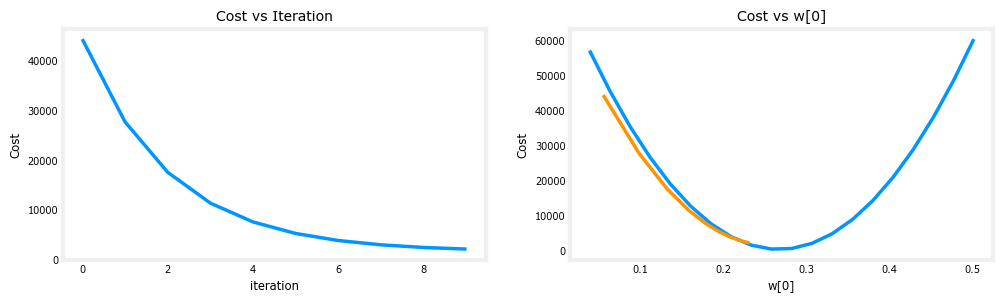

In [9]:
plot_cost_i_w(X_train,y_train,hist)

<span style="color:green">A la izquierda, verá que el costo está disminuyendo como debería. A la derecha puede ver que</span> $w_0$ <span style="color:green">está disminuyendo sin cruzar el mínimo. Tenga en cuenta que</span> `dj_w0` <span style="color:green">es negativo durante toda la ejecución. Esta solución también convergerá, aunque no tan rápido como el ejemplo anterior.</span>

## Feature Scaling 
<span style="color:green">Las conferencias describieron la importancia de cambiar la escala del conjunto de datos para que las características tengan un rango similar.
Si está interesado en los detalles de por qué este es el caso, haga clic en el encabezado 'detalles' a continuación. De lo contrario, la siguiente sección lo guiará a través de una implementación de cómo escalar características.<span>

<details>
<summary>
    <font size='3', color='darkgreen'><b>Details</b></font>
</summary>

Let's look again at the situation with $\alpha$ = 9e-7. This is pretty close to the maximum value we can set $\alpha$  to without diverging. This is a short run showing the first few iterations:<br/>
<span style="color:green">Veamos de nuevo la situación con</span> $\alpha$ = 9e-7<span style="color:green">. Esto está bastante cerca del valor máximo que podemos establecer en</span> $\alpha$ <span style="color:green">sin divergir. Esta es una tirada corta que muestra las primeras iteraciones:</span>

<figure>
    <img src="./images/C1_W2_Lab06_ShortRun.PNG" style="width:1200px;" >
</figure>

Above, while cost is being decreased, its clear that $w_0$ is making more rapid progress than the other parameters due to its much larger gradient.

<span style="color:green">Arriba, mientras se reduce el costo, está claro que</span> $w_0$ <span style="color:green">está progresando más rápido que los otros parámetros debido a su gradiente mucho más grande.</span>

The graphic below shows the result of a very long run with $\alpha$ = 9e-7. This takes several hours.

<span style="color:green">El siguiente gráfico muestra el resultado de una ejecución muy larga con</span> $\alpha$ = 9e-7. <span style="color:green">Esto lleva varias horas.</span>

<figure>
    <img src="./images/C1_W2_Lab06_LongRun.PNG" style="width:1200px;" >
</figure>
    
Above, you can see cost decreased slowly after its initial reduction. Notice the difference between `w0` and `w1`,`w2`,`w3` as well as  `dj_dw0` and `dj_dw1-3`. `w0` reaches its near final value very quickly and `dj_dw0` has quickly decreased to a small value showing that `w0` is near the final value. The other parameters were reduced much more slowly.

<span style="color:green">
Arriba, puede ver que el costo disminuyó lentamente después de su reducción inicial. Observe la diferencia entre `w0` y `w1`, `w2`, `w3` así como `dj_dw0` y `dj_dw1-3`. `w0` alcanza su valor casi final muy rápidamente y `dj_dw0` ha disminuido rápidamente a un valor pequeño que muestra que `w0` está cerca del valor final. Los otros parámetros se redujeron mucho más lentamente.
</span>

Why is this?  Is there something we can improve? See below:<br/>
<span style="color:green">¿Por qué es esto? ¿Hay algo que podamos mejorar? Vea abajo:</span>
<figure>
    <center> <img src="./images/C1_W2_Lab06_scale.PNG"   ></center>
</figure>   

The figure above shows why $w$'s are updated unevenly. 
- $\alpha$ is shared by all parameter updates ($w$'s and $b$).
- the common error term is multiplied by the features for the $w$'s. (not $b$).
- the features vary significantly in magnitude making some features update much faster than others. In this case, $w_0$ is multiplied by 'size(sqft)', which is generally > 1000,  while $w_1$ is multiplied by 'number of bedrooms', which is generally 2-4. 
    
The solution is Feature Scaling.<br/>

<span style="color:green">La figura anterior muestra por qué los</span> $w$'s <span style="color:green">se actualizan de manera desigual.</span>
- $\alpha$ <span style="color:green">es compartido por todas las actualizaciones de parámetros</span> ($w$'s y $b$).
- <span style="color:green">el término de error común se multiplica por las características de los</span> $w$. (no $b$).
- <span style="color:green">las funciones varían significativamente en magnitud, lo que hace que algunas funciones se actualicen mucho más rápido que otras. En este caso,</span> $w_0$ <span style="color:green">se multiplica por 'tamaño (pies cuadrados)', que generalmente es > 1000, mientras que</span> $w_1$ <span style="color:green">se multiplica por 'número de habitaciones', que generalmente es 2-4.</span>
    
<span style="color:green">La solución es el escalado de características.</span>

<span style="color:green">Las conferencias discutieron tres técnicas diferentes:</span>
- <span style="color:green">Escalado de características, esencialmente dividiendo cada característica positiva por su valor máximo, o más generalmente, reescalando cada característica por sus valores mínimo y máximo usando (x-min)/(max-min). Ambas formas normalizan las características al rango de -1 y 1, donde el primer método funciona para características positivas, lo cual es simple y sirve bien para el ejemplo de la lección, y el último método funciona para cualquier característica.</span>
- <span style="color:green">Normalización media:</span> $x_i := \dfrac{x_i - \mu_i}{max - min} $
- <span style="color:green">Normalización de puntuación Z que exploraremos a continuación.</span>

In [10]:
def zscore_normalize_features(X):    
    # procesar para encontrar la media de cada columna/característica
    mu     = np.mean(X, axis=0)
    # encontrar la desviación estándar de cada columna/característica
    sigma  = np.std(X, axis=0)    
    X_norm = (X - mu) / sigma      

    return (X_norm, mu, sigma)

<span style="color:green">Veamos los pasos involucrados en la normalización del puntaje Z. La siguiente gráfica muestra la transformación paso a paso.<span>

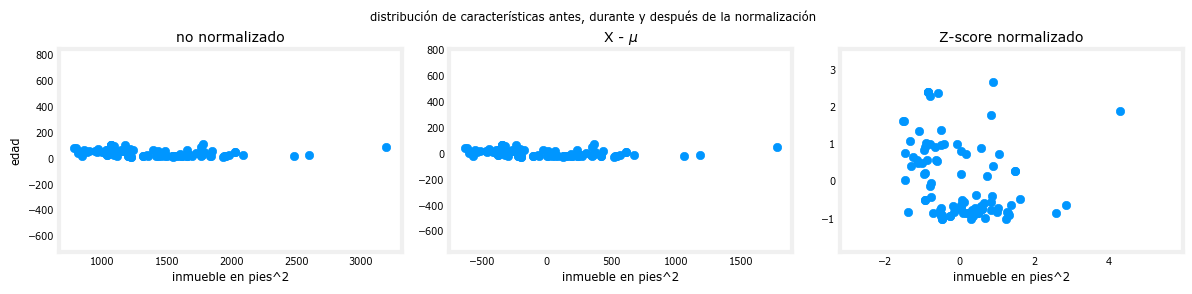

In [11]:
mu     = np.mean(X_train,axis=0)   
sigma  = np.std(X_train,axis=0) 
X_mean = (X_train - mu)
X_norm = (X_train - mu)/sigma      

fig,ax=plt.subplots(1, 3, figsize=(12, 3))
ax[0].scatter(X_train[:,0], X_train[:,3])
ax[0].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[0].set_title("no normalizado")
ax[0].axis('equal')

ax[1].scatter(X_mean[:,0], X_mean[:,3])
ax[1].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[1].set_title(r"X - $\mu$")
ax[1].axis('equal')

ax[2].scatter(X_norm[:,0], X_norm[:,3])
ax[2].set_xlabel(X_features[0]); ax[0].set_ylabel(X_features[3]);
ax[2].set_title(r"Z-score normalizado")
ax[2].axis('equal')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("distribución de características antes, durante y después de la normalización")
plt.show()

<span style="color:green">El gráfico anterior muestra la relación entre dos de los parámetros del conjunto de entrenamiento, "edad" y "tamaño (pies cuadrados)". *Estos están trazados con la misma escala*.</span>
- <span style="color:green">Izquierda: Sin normalizar: el rango de valores o la variación de la característica 'tamaño (pies cuadrados)' es mucho mayor que la edad</span>
- <span style="color:green">Medio: el primer paso elimina el valor medio o promedio de cada característica. Esto deja características que están centradas alrededor de cero. Es difícil ver la diferencia en la función 'edad', pero el 'tamaño (pies cuadrados)' está claramente alrededor de cero.</span>
- <span style="color:green">Derecha: El segundo paso se divide por la desviación estándar. Esto deja ambas características centradas en cero con una escala similar.</span>

<span style="color:green">Normalicemos los datos y comparémoslos con los datos originales.</span>

In [12]:
# normalize the original features
X_norm, X_mu, X_sigma = zscore_normalize_features(X_train)
print(f"X_mu = {X_mu}, \nX_sigma = {X_sigma}")
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

X_mu = [1.42e+03 2.73e+00 1.38e+00 3.84e+01], 
X_sigma = [411.62   0.62   0.49  25.78]
Peak to Peak range by column in Raw        X:[2.41e+03 3.00e+00 1.00e+00 9.50e+01]
Peak to Peak range by column in Normalized X:[5.85 4.87 2.06 3.69]


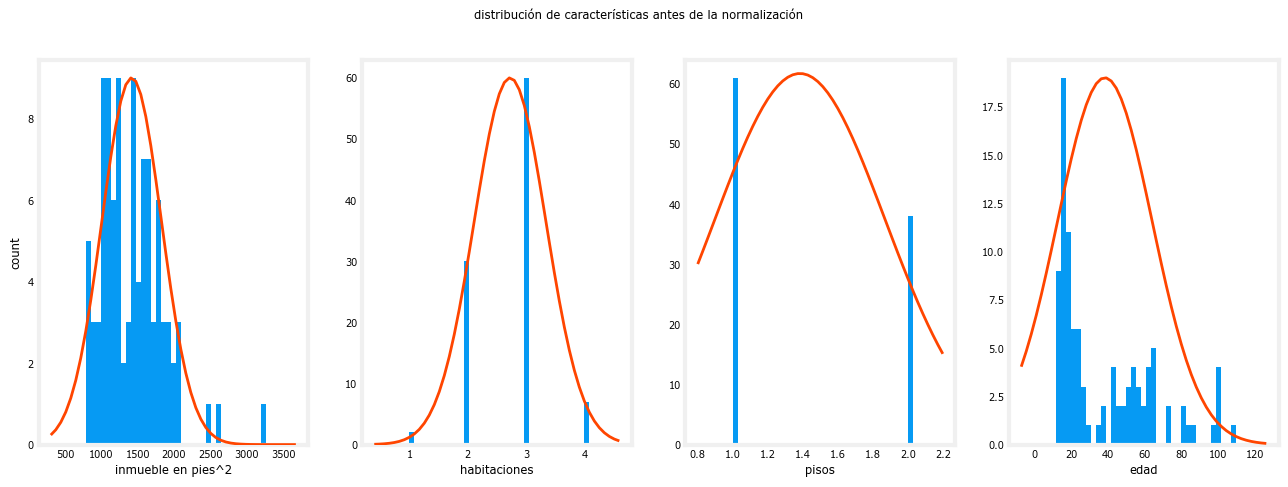

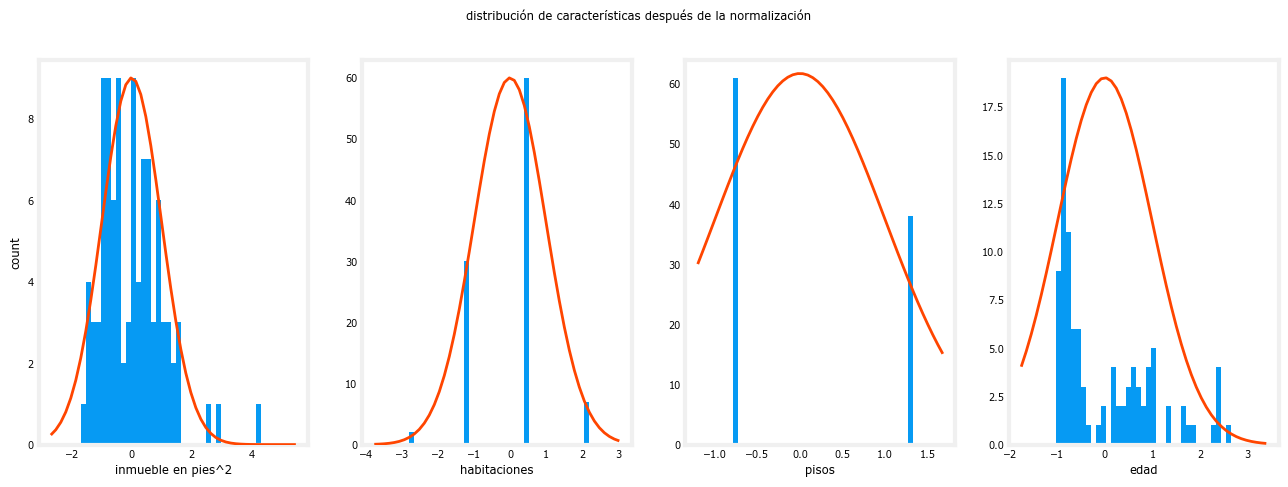

In [13]:
fig,ax=plt.subplots(1, 4, figsize=(16, 5))
for i in range(len(ax)):
    norm_plot(ax[i],X_train[:,i],)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("count");
fig.suptitle("distribución de características antes de la normalización")
plt.show()
fig,ax=plt.subplots(1,4,figsize=(16,5))
for i in range(len(ax)):
    norm_plot(ax[i],X_norm[:,i],)
    ax[i].set_xlabel(X_features[i])
ax[0].set_ylabel("count"); 
fig.suptitle("distribución de características después de la normalización")

plt.show()

In [14]:
w_norm, b_norm, hist = run_gradient_descent(X_norm, y_train, 1000, 1.0e-1, )

Iteration Cost          w0       w1       w2       w3       b       djdw0    djdw1    djdw2    djdw3    djdb  
---------------------|--------|--------|--------|--------|--------|--------|--------|--------|--------|--------|
        0 5.75907e+04  8.9e+00  3.5e+00  3.3e+00 -6.0e+00  3.6e+01 -8.9e+01 -3.5e+01 -3.3e+01  6.0e+01 -3.6e+02
      100 2.33567e+02  1.1e+02 -1.9e+01 -3.2e+01 -3.9e+01  3.6e+02 -1.1e+00  5.9e-01  5.6e-01 -1.9e-01 -9.6e-03
      200 2.30814e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -4.4e-02  2.5e-02  2.2e-02 -8.4e-03 -2.6e-07
      300 2.30809e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -1.8e-03  1.0e-03  9.2e-04 -3.5e-04 -6.9e-12
      400 2.30809e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -7.5e-05  4.3e-05  3.8e-05 -1.4e-05 -2.7e-13
      500 2.30809e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -3.1e-06  1.8e-06  1.6e-06 -5.9e-07 -2.7e-13
      600 2.30809e+02  1.1e+02 -2.1e+01 -3.3e+01 -3.8e+01  3.6e+02 -1.3e-07  7.3e-08  6.5e-08 -2.4e-08 -

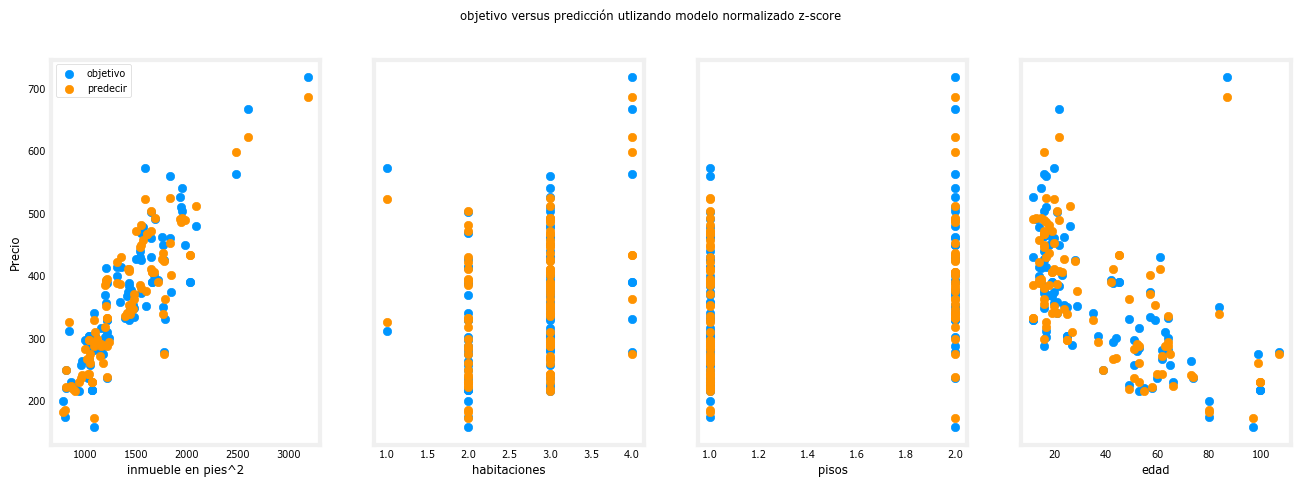

In [15]:
# predecir el objetivo del costo en base a las características normalizadas
m = X_norm.shape[0]
yp = np.zeros(m)
for i in range(m):
    yp[i] = np.dot(X_norm[i], w_norm) + b_norm

    # trazar predicciones y objetivos frente a características originales    
fig,ax=plt.subplots(1,4,figsize=(16, 5),sharey=True)
for i in range(len(ax)):
    ax[i].scatter(X_train[:,i],y_train, label = 'objetivo')
    ax[i].set_xlabel(X_features[i])
    ax[i].scatter(X_train[:,i],yp,color=dlc["dlorange"], label = 'predecir')
ax[0].set_ylabel("Precio"); ax[0].legend();
fig.suptitle("objetivo versus predicción utlizando modelo normalizado z-score")
plt.show()

### LEYENDA:
Objetivo versus la predicción del procesamiento en base al modelo normalizado.

<span style="color:green">
**Predicción**
El objetivo de generar nuestro modelo es usarlo para predecir los precios de la vivienda que no están en el conjunto de datos. Vamos a predecir el precio de una casa de 1200 pies cuadrados, 3 habitaciones, 1 piso, 40 años. Recuerde que debe normalizar los datos con la media y la desviación estándar derivadas cuando se normalizaron los datos de entrenamiento.
</span>

In [16]:
x_house = np.array([1388.56, 3, 3, 35])
print(x_house[0], x_house[1], x_house[2], x_house[3])
x_house_norm = (x_house - X_mu) / X_sigma
print(x_house_norm)
x_house_predict = np.dot(x_house_norm, w_norm) + b_norm
print(f"precio estimado de una casa con {x_house[0]} pies cuadrados, {x_house[1]} habitaciones, {x_house[2]} piso, {x_house[3]} años = $ {x_house_predict*1000:0.2f}")

1388.56 3.0 3.0 35.0
[-0.07  0.44  3.32 -0.13]
precio estimado de una casa con 1388.56 pies cuadrados, 3.0 habitaciones, 3.0 piso, 35.0 años = $ 240387.19


In [50]:
# First, normalize out example.
pie_cuadrado = 10.764
#pie_cuadrado = 10.7639
mts = 66.6
rooms = 5
floor = 2
age = 2
location = 32
percent = percent_location(location)
mts_cuadrados = mts * pie_cuadrado

#mts2, habitaciones, piso, edad
x_house = np.array([mts_cuadrados, rooms, floor, age])
#print(x_house[0], x_house[1], x_house[2], x_house[3])
#print('X_sigma: ', X_sigma)
x_house_norm = (x_house - X_mu) / X_sigma
#print(x_house_norm)
x_house_predict = np.dot(x_house_norm, w_norm) + b_norm
x_house_predictp = (x_house_predict*1000)
x_house_predictp = x_house_predictp + (x_house_predictp * percent)

#print(f"precio estimado de una casa con {mts} m^2 ({x_house[0]} pies^2), {x_house[1]} habitaciones, {x_house[2]} piso, {x_house[3]} años = $ {x_house_predict*1000:0,.2f}")
print(f"Precio estimado del inmueble de {mts} m² con {x_house[1]} espacios en el piso {x_house[2]} con {x_house[3]} años de construcción ubicado en el distrito de {read_location(location)}, valorizado en $ {x_house_predictp:0,.2f}")


Precio estimado del inmueble de 66.6 m² con 5.0 espacios en el piso 2.0 con 2.0 años de construcción ubicado en el distrito de San Miguel, valorizado en $ 107,542.25


In [19]:
l = percent_location(41)
print(l)

0.007
